<a href="https://colab.research.google.com/github/Sharan1704/IPL-score-prediction-model/blob/main/IPL_score_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime

In [8]:
# Loading the dataset
df = pd.read_csv('/content/ipl_data.csv')
df.shape


(76014, 15)

In [9]:
# Data Cleaning: Converting date to datetime and checking for missing values
df['date'] = pd.to_datetime(df['date'])
df.dropna(inplace=True)

In [10]:
# Feature Engineering: Extracting date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

In [11]:
# Rolling Statistics: Calculating rolling averages (example for runs and wickets)
df['rolling_avg_runs'] = df.groupby('batsman')['runs'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
df['rolling_avg_wickets'] = df.groupby('bowler')['wickets'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Interaction Features: Example between batting and bowling teams
df['bat_bowl_interaction'] = df['bat_team'] + '_vs_' + df['bowl_team']

# Cumulative Stats: Example cumulative runs and wickets
df['cumulative_runs'] = df.groupby('batsman')['runs'].cumsum()
df['cumulative_wickets'] = df.groupby('bowler')['wickets'].cumsum()

In [12]:
# Player and Venue Stats: Example historical performance
player_venue_stats = df.groupby(['batsman', 'venue'])['runs'].mean().reset_index()
player_venue_stats.columns = ['batsman', 'venue', 'avg_runs_venue']
df = pd.merge(df, player_venue_stats, on=['batsman', 'venue'], how='left')

In [13]:
# Encoding Categorical Variables: OneHotEncoding
categorical_features = ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'bat_bowl_interaction']
numeric_features = ['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'year', 'month', 'day', 'day_of_week', 'rolling_avg_runs', 'rolling_avg_wickets', 'cumulative_runs', 'cumulative_wickets', 'avg_runs_venue']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [14]:
# Fit and transform the data
X = df.drop(['total', 'date','month','day','day_of_week','bat_bowl_interaction'], axis=1)  # Drop target and date columns
y = df['total']  # Target variable
print(X)

       mid                                      venue               bat_team  \
0        1                      M Chinnaswamy Stadium  Kolkata Knight Riders   
1        1                      M Chinnaswamy Stadium  Kolkata Knight Riders   
2        1                      M Chinnaswamy Stadium  Kolkata Knight Riders   
3        1                      M Chinnaswamy Stadium  Kolkata Knight Riders   
4        1                      M Chinnaswamy Stadium  Kolkata Knight Riders   
...    ...                                        ...                    ...   
76009  617  Rajiv Gandhi International Stadium, Uppal         Mumbai Indians   
76010  617  Rajiv Gandhi International Stadium, Uppal         Mumbai Indians   
76011  617  Rajiv Gandhi International Stadium, Uppal         Mumbai Indians   
76012  617  Rajiv Gandhi International Stadium, Uppal         Mumbai Indians   
76013  617  Rajiv Gandhi International Stadium, Uppal         Mumbai Indians   

                         bowl_team     

In [15]:
df.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,...,year,month,day,day_of_week,rolling_avg_runs,rolling_avg_wickets,bat_bowl_interaction,cumulative_runs,cumulative_wickets,avg_runs_venue
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,...,2008,4,18,4,1.000000,0.0,Kolkata Knight Riders_vs_Royal Challengers Ban...,1,0,50.403846
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,...,2008,4,18,4,1.000000,0.0,Kolkata Knight Riders_vs_Royal Challengers Ban...,1,0,83.190141
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,...,2008,4,18,4,1.500000,0.0,Kolkata Knight Riders_vs_Royal Challengers Ban...,3,0,83.190141
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,...,2008,4,18,4,1.666667,0.0,Kolkata Knight Riders_vs_Royal Challengers Ban...,5,0,83.190141
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,...,2008,4,18,4,1.750000,0.0,Kolkata Knight Riders_vs_Royal Challengers Ban...,7,0,83.190141


In [16]:
# Creating the preprocessing and model pipeline (Example using Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [17]:
# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Defining categorical and numerical features
categorical_features = ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']
numeric_features = ['mid','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker','year','rolling_avg_runs','rolling_avg_wickets','cumulative_runs','cumulative_wickets','avg_runs_venue']

# Creating a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Applying the transformations to the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [19]:
# Creating the neural network model
import keras
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_transformed.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compiling the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [20]:
# Training the model
model.fit(X_train_transformed, y_train, epochs=50, batch_size=64, validation_data=(X_test_transformed, y_test))

Epoch 1/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - loss: 39.7716 - val_loss: 13.2856
Epoch 2/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 12.0833 - val_loss: 10.4464
Epoch 3/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 10.0661 - val_loss: 8.9524
Epoch 4/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 8.0545 - val_loss: 7.3095
Epoch 5/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 6.7217 - val_loss: 6.3161
Epoch 6/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 5.9476 - val_loss: 5.9682
Epoch 7/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 5.3850 - val_loss: 5.6483
Epoch 8/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 4.8839 - val_loss: 4.9790
Epoch 9/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 4.4602 - val_loss: 4.6907
Epoch 10/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 4.1778 - val_loss: 4.4992
Epoch 11/50
951/951 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 3.9312 - val_loss: 4.4367
Epoch 12/50
951/951 ━━━━━

<Axes: >

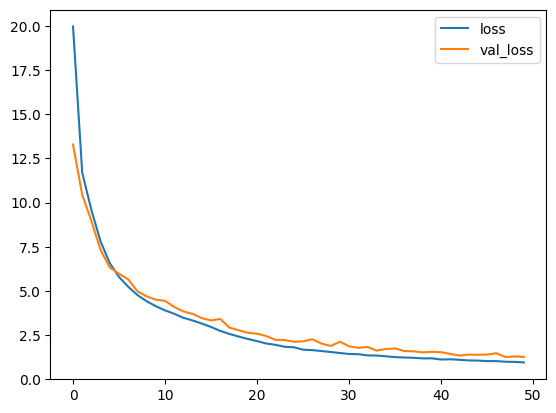

In [21]:
#storing the training and validation loss values to the neural network during the training process
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [22]:
# Making predictions and evaluvating the model
predictions = model.predict(X_test_transformed)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE\t",mean_absolute_error(y_test,predictions))
print("r2 score\t",r2_score(y_test, predictions))
print("MSE\t",mean_squared_error(y_test, predictions))
print("RMSE\t",np.sqrt(mean_squared_error(y_test, predictions)))
print("Evaluvation\t",model.evaluate(X_test_transformed,y_test))


476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
MAE	 1.682955045774721
r2 score	 0.9894128364343672
MSE	 8.930182762081218
RMSE	 2.98834113883961
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2809
Evaluvation	 1.2596393823623657


In [23]:
predictions = model.predict(X_test_transformed)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)



476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


1.682955045774721

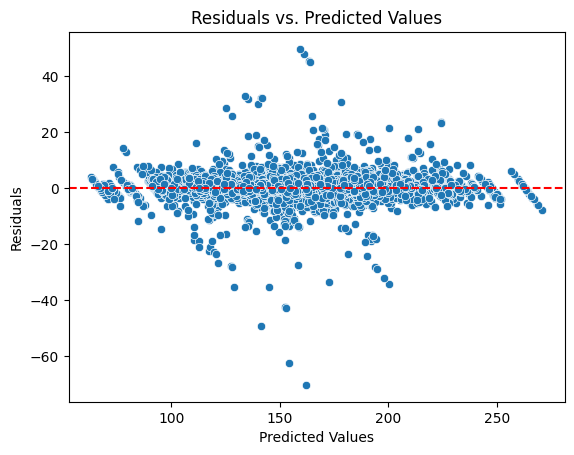

In [24]:
#Creating a Residual Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_true (actual values) and y_pred (predicted values)
residuals = y_test - predictions.flatten()

sns.scatterplot(x=predictions.flatten(), y=residuals)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at zero
plt.show()

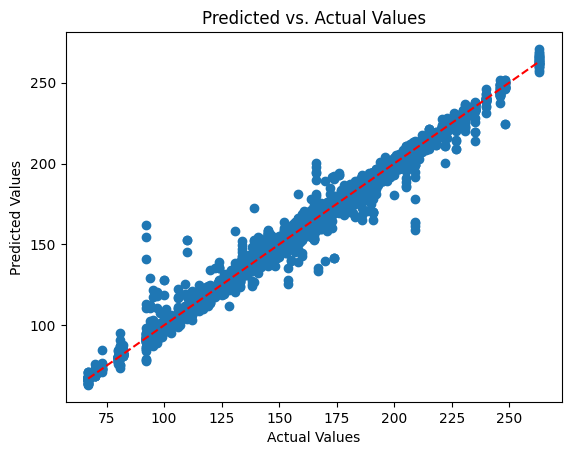

In [25]:
#Predicted vs. Actual Values Plot
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

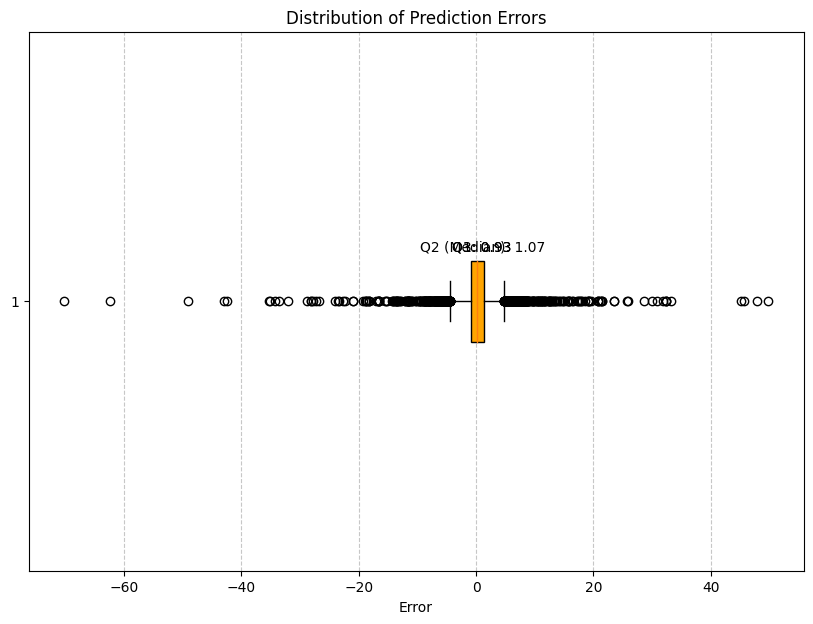

In [26]:
#ploting a box plot
import matplotlib.pyplot as plt

# Calculating prediction errors
errors = y_test - predictions.flatten()

# Creating a figure and axes with a specific size and orientation
plt.figure(figsize=(10, 7))  # Adjust width and height as needed

# Creating the box plot
bp = plt.boxplot(errors, vert=False, patch_artist=True, showfliers=True)  # Set vert=False for horizontal orientation

# Add labels and title
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')

# Getting the quartiles
q1 = bp['boxes'][0].get_path().vertices[0, 1] # Extract the first quartile (bottom)
q2 = bp['boxes'][0].get_path().vertices[2, 1] # Extract the second quartile (median)
q3 = bp['boxes'][0].get_path().vertices[4, 1] # Extract the third quartile (top)

# Add text annotations for quartiles
plt.text(q1, 1.1, f'Q1: {q1:.2f}', va='center', ha='center')
plt.text(q2, 1.1, f'Q2 (Median): {q2:.2f}', va='center', ha='center')
plt.text(q3, 1.1, f'Q3: {q3:.2f}', va='center', ha='center')

# Customize the plot appearance (optional)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
bp['boxes'][0].set_facecolor('orange')

# Show the plot
plt.show()

In [27]:
#displaying and predicting the model
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler  # Import statements

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Select Venue:')
bat_team = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowl_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Batting Team:')
batsman = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

# Initialize encoders
venue_encoder = LabelEncoder()  # Encoder for venue (categorical)
bat_team_encoder = LabelEncoder()  # Encoder for batting_team (categorical)
bowl_team_encoder = LabelEncoder()  # Encoder for bowling_team (categorical)
batsman_encoder = LabelEncoder()  # Encoder for striker (categorical)
bowler_encoder = LabelEncoder()  # Encoder for bowler (categorical)


# Feature names (assuming you know the names of your features)
feature_names = ['mid','venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs','wickets','overs','runs_last_5','wickets_last_5','striker','non-striker','year','rolling_avg_runs','rolling_avg_wickets','cumulative_runs','cumulative_wickets','avg_runs_venue']

# Define dictionaries for missing features and their default values
missing_features = {
    'mid': df['mid'].mean() if df['mid'].dtype != object else df['mid'].mode()[0],
    'runs': df['runs'].mean() if df['runs'].dtype != object else df['runs'].mode()[0],
    'wickets': df['wickets'].mean() if df['wickets'].dtype != object else df['wickets'].mode()[0],
    'overs': df['overs'].mean() if df['overs'].dtype != object else df['overs'].mode()[0],
    'runs_last_5': df['runs_last_5'].mean() if df['runs_last_5'].dtype != object else df['runs_last_5'].mode()[0],
    'wickets_last_5': df['wickets_last_5'].mean() if df['wickets_last_5'].dtype != object else df['wickets_last_5'].mode()[0],
    'striker': df['striker'].mean() if df['striker'].dtype != object else df['striker'].mode()[0],
    'non-striker': df['non-striker'].mean() if df['non-striker'].dtype != object else df['non-striker'].mode()[0],
    'year': df['year'].mean() if df['year'].dtype != object else df['year'].mode()[0],
    'rolling_avg_runs': df['rolling_avg_runs'].mean() if df['rolling_avg_runs'].dtype != object else df['rolling_avg_runs'].mode()[0],
    'rolling_avg_wickets': df['rolling_avg_wickets'].mean() if df['rolling_avg_wickets'].dtype != object else df['rolling_avg_wickets'].mode()[0],
    'cumulative_runs': df['cumulative_runs'].mean() if df['cumulative_runs'].dtype != object else df['cumulative_runs'].mode()[0],
    'cumulative_wickets': df['cumulative_wickets'].mean() if df['cumulative_wickets'].dtype != object else df['cumulative_wicktes'].mode()[0],
    'avg_runs_venue': df['avg_runs_venue'].mean() if df['avg_runs_venue'].dtype != object else df['avg_runs_venue'].mode()[0]


    # ... Add other missing features and their defaults
}

# Fit encoders to your data (replace 'df' with your DataFrame)
venue_encoder.fit(df['venue'])
bat_team_encoder.fit(df['bat_team'])
bowl_team_encoder.fit(df['bowl_team'])
batsman_encoder.fit(df['batsman'])
bowler_encoder.fit(df['bowler'])

# Define the scaler object
scaler = MaxAbsScaler()
scaler.fit(X_train_transformed)  # Fit the scaler to the transformed training data


def predict_score(b):
    with output:
        clear_output()

        # Create a dictionary to store all features and their values
        all_features = {
            'venue': venue.value,
            'bat_team': bat_team.value,
            'bowl_team': bowl_team.value,
            'batsman': batsman.value,
            'bowler': bowler.value,
            **missing_features
        }

        # Extract values from the dictionary
        input_data = []
        for feature_name in feature_names:
            value = all_features.get(feature_name)
            if value is None:  # Handle missing features
                raise ValueError(f"Missing value for feature: {feature_name}")
            input_data.append(value)

       # Create a DataFrame from the input data
        input_data_df = pd.DataFrame(data=[input_data], columns=feature_names)

        # Ensure input data columns match training data columns
        input_data_columns = input_data_df.columns.tolist()
        X_train_columns = X_train.columns.tolist()
        if input_data_columns != X_train_columns:
            input_data_df = input_data_df[X_train_columns]

        # Transform and scale data
        input_transformed = preprocessor.transform(input_data_df)
        input_scaled = scaler.transform(input_transformed)

        predicted_score = model.predict(input_scaled)
        predicted_score = int(predicted_score[0, 0])

        print(predicted_score)

In [28]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, bat_team, bowl_team, batsman, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

In [30]:
import pandas as pd

# Assuming you have a DataFrame with 'actual' and 'predicted' columns
results_df = pd.DataFrame({'actual': y_test, 'predicted': predictions.flatten()})

results_df.to_csv('model_predictions.csv', index=False)

In [31]:
results_df.to_excel('model_predictions.xlsx', index=False)

In [34]:
results_df.head()

,actual,predicted
12590,134,135.526474
74893,195,195.374588
56763,183,180.950165
19428,183,181.013702
30216,193,190.739746
